In [14]:
import torch
import matplotlib.pyplot as plt
from AnaVox.analysis_code.svd_analysis import captured_variance, compute_common_embedding

In [2]:
angles = torch.linspace(0, 2 * torch.pi, 360)
circle = torch.stack((torch.cos(angles), torch.sin(angles)), axis=1)

angles_half = torch.linspace(0, torch.pi, 360)
half_circle = torch.stack((torch.cos(angles_half), torch.sin(angles_half)), axis=1)



In [3]:
def generate_image(x, y, B):
    grid = torch.linspace(-B/2, B/2, B)

    grid_x, grid_y = torch.meshgrid(grid, grid)
    center = torch.stack((x * 0.25, y * 0.25), axis=0) * B
    radius = 0.1 * B

    mask = (grid_x - center[0])**2 + (grid_y - center[1])**2 < radius**2

    return mask.to(float)


data_full = torch.stack([generate_image(c[0], c[1], 200) for c in circle])
data_half = torch.stack([generate_image(c[0], c[1], 200) for c in half_circle])

/mnt/home/dsilvasanchez/virtual_envs/AnaVox-env/lib/python3.10/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
preapre_for_pca = lambda data: (data - data.mean(dim=0, keepdims=True)).reshape(data.shape[0], -1)

U_full, S_full, V_full = torch.svd_lowrank(preapre_for_pca(data_full), q=40)
U_half, S_half, V_half = torch.svd_lowrank(preapre_for_pca(data_half), q=40)

In [10]:
captured_variance(V_full, V_half, S_half)

tensor(0.9656, dtype=torch.float64)

In [11]:
captured_variance(V_half, V_full, S_full)

tensor(0.5296, dtype=torch.float64)

Text(0.5, 1.0, 'PCA of Half circle')

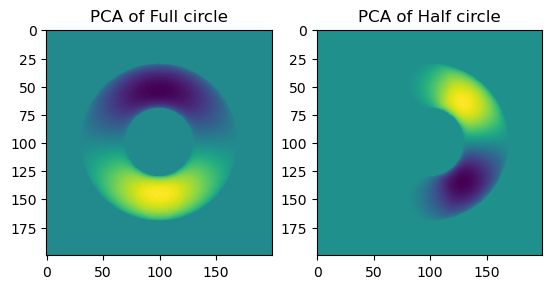

In [13]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(V_full[:, 0].reshape(200, 200))
ax[0].set_title("PCA of Full circle")

ax[1].imshow(V_half[:, 0].reshape(200, 200))
ax[1].set_title("PCA of Half circle")

In [15]:
circles_data = {
    "full": {
        "eigenvectors": V_full,
        "singular_values": S_full,
        "u_matrices": U_full,
    },
    "half": {
        "eigenvectors": V_half,
        "singular_values": S_half,
        "u_matrices": U_half,
    }
}

common_embedding = compute_common_embedding(circles_data)

In [24]:
common_embedding["common_embedding"].keys()

dict_keys(['full', 'half'])

In [16]:
common_embedding["common_eigenvectors"].shape

torch.Size([80, 40000])

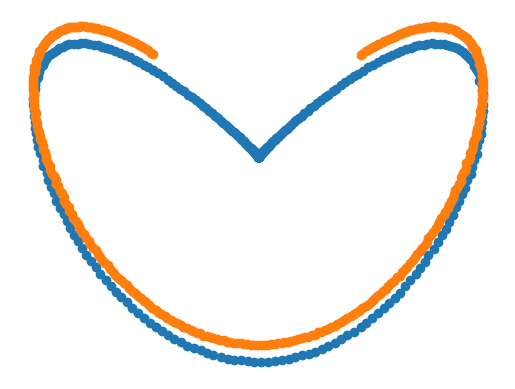

In [33]:
pc1 = 0
pc2 = 1

fig, ax = plt.subplots()

for circle_type in circles_data:
    ax.scatter(common_embedding["common_embedding"][circle_type][:, pc1], common_embedding["common_embedding"][circle_type][:, pc2], label=circle_type)

ax.set_axis_off()
#ax.legend()

(-0.5, 199.5, 199.5, -0.5)

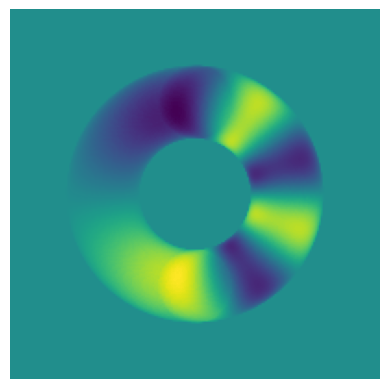

In [34]:
plt.imshow(common_embedding["common_eigenvectors"][4].reshape(200, 200))
plt.axis("off")